In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# upload dataset
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [174]:
df.isna().sum().any()

False

In [175]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [176]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels

df['month']=pd.DatetimeIndex(df['Date_month_year']).month   # add month column

In [177]:
df # month column added

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6


In [178]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'month'],
      dtype='object')

In [179]:
trend=df['Customer Complaint'].groupby(df['month']).count().reset_index()
trend

,month,Customer Complaint
0,1,55
1,2,59
2,3,45
3,4,375
4,5,317
5,6,1046
6,7,49
7,8,67
8,9,55
9,10,53


# monthly trend chart

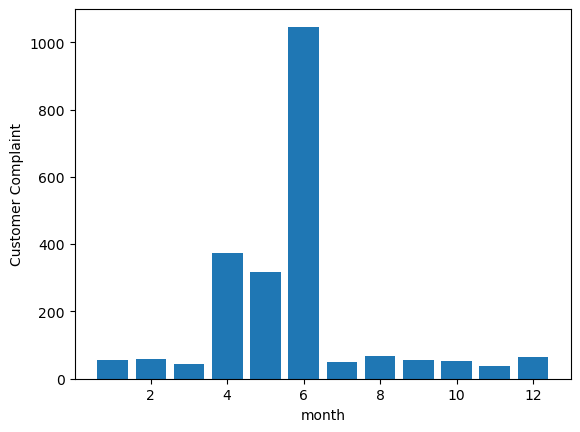

In [180]:
x=trend['month']
y=trend['Customer Complaint']
plt.bar(x,y)
plt.xlabel('month')
plt.ylabel('Customer Complaint')
plt.show()

# daily trend chart

In [190]:
import datetime
from dateutil.parser import parse
import pytz

In [186]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])    # convert 'Date_month_year' column into datetime

In [187]:
df['Date of the Month'] = df['Date_month_year'].apply(lambda d: d.day)
d = df['Customer Complaint'].groupby(df['Date of the Month']).count().reset_index()
d

,Date of the Month,Customer Complaint
0,4,206
1,5,131
2,6,272
3,13,68
4,14,54
5,15,58
6,16,65
7,17,60
8,18,69
9,19,50


In [188]:
d=df['Customer Complaint'].groupby(df['Date of the Month']).count().reset_index()
d

,Date of the Month,Customer Complaint
0,4,206
1,5,131
2,6,272
3,13,68
4,14,54
5,15,58
6,16,65
7,17,60
8,18,69
9,19,50


Text(0, 0.5, 'Customer Complaint')

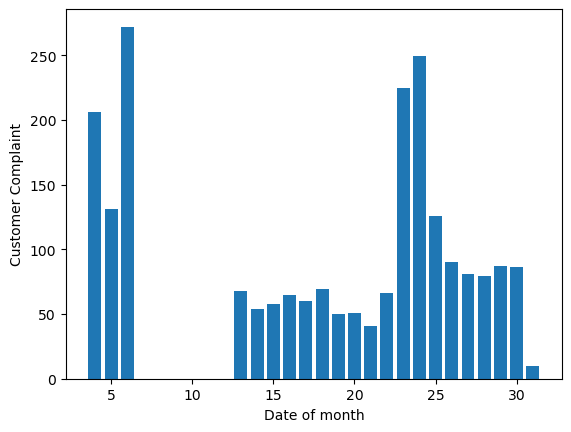

In [189]:
x=d['Date of the Month']
y=d['Customer Complaint']
plt.bar(x,y)
plt.xlabel('Date of month')
plt.ylabel('Customer Complaint')

# Provide a table with the frequency of complaint types.

In [19]:
import numpy as np

In [20]:
df['Customer Complaint'].head(20)

0                         Comcast Cable Internet Speeds
1          Payment disappear - service got disconnected
2                                     Speed and Service
3     Comcast Imposed a New Usage Cap of 300GB that ...
4            Comcast not working and no service to boot
5     ISP Charging for arbitrary data limits with ov...
6         Throttling service and unreasonable data caps
7     Comcast refuses to help troubleshoot and corre...
8                              Comcast extended outages
9     Comcast Raising Prices and Not Being Available...
10    Billing after service was asked to be disconne...
11        YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE
12    Comcast Violating Open Internet Rules by Block...
13                                       Internet speed
14                     Internet Disconnects Every Night
15                                   Internet complaint
16                      Internet Availability and Speed
17    Comcast owes me $65 and claims I need to r

In [21]:
df["Complaint Category"] = np.where(df["Customer Complaint"].str.contains('Internet|Speed|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(df["Customer Complaint"].str.contains('Payment|Disappear|Disconnected',case=False,regex=True), 'Paym',
         np.where(df["Customer Complaint"].str.contains('Comcast|Imposed|New|Usage|Cap|of',case=False,regex=True), 'Usage',
         np.where(df["Customer Complaint"].str.contains('complaint|breach|bully|non response|False|invalid',case=False,regex=True), 'Greviances',
         np.where(df["Customer Complaint"].str.contains('email|mail',case=False,regex=True), 'Email',
         np.where(df["Customer Complaint"].str.contains('policies|competition|Forgery|Fraud|Deceptive|deception|scam|business',case=False,regex=True), 'Marketing',
         'Other'))))))

In [22]:
df['Complaint Category']

0       Internet
1           Paym
2       Internet
3          Usage
4          Usage
          ...   
2219       Other
2220    Internet
2221       Usage
2222       Usage
2223    Internet
Name: Complaint Category, Length: 2224, dtype: object

In [55]:
df      #Complaint Category column added

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Paym
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Other
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Internet
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Usage
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Usage


In [56]:
d3=pd.DataFrame(df['Customer Complaint'].groupby(df['Complaint Category']).count().sort_values(ascending=True)).reset_index()

In [57]:
#  Provide a table with the frequency of complaint types.
d3

,Complaint Category,Customer Complaint
0,Email,12
1,Paym,14
2,Greviances,27
3,Marketing,32
4,Other,407
5,Internet,721
6,Usage,1011


#  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [38]:
df['UPDATED_STATE']=np.where(df['Status'].str.contains('Open|Pending',case=False,regex=True),'Open',
          np.where(df['Status'].str.contains('Solved|Closed',case=False,regex=True),'Closed' ,
                  'Other'))

In [39]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Paym,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Usage,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Other,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Internet,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Usage,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Usage,Closed


#  Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

# Which state has the maximum complaints
# Which state has the highest percentage of unresolved complaints
# - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [72]:
# state wise status of complaints in a stacked bar chart

In [40]:
df['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

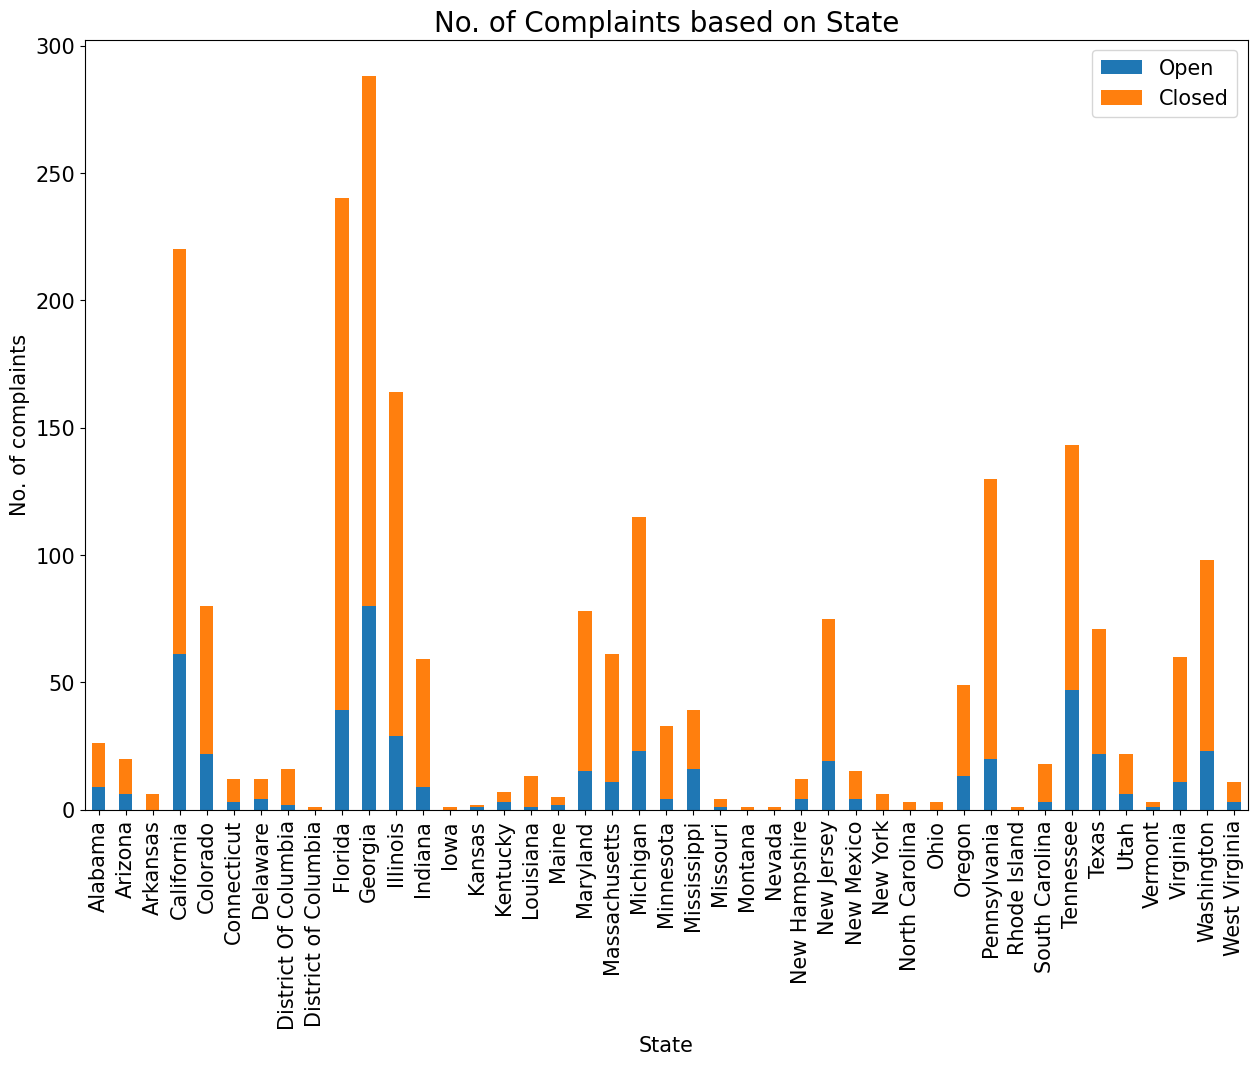

In [41]:
ch = df.groupby(['State', 'UPDATED_STATE'])['State'].count().unstack('UPDATED_STATE')

z = ch[['Open','Closed']].plot(kind='bar', stacked=True,rot=90,figsize=(15,10),fontsize=15)

z.set_xlabel("State",fontsize=15)
z.set_ylabel("No. of complaints",fontsize=15)
z.set_title("No. of Complaints based on State",fontsize=20)
z.legend(labels=['Open','Closed'],fontsize=15)

# Which state has the maximum complaints:
   from Graph ,we can infer that Georgia has maximum no. of complaints

# Which state has highest percentage of unresolved complaints

In [43]:
c=df[df['UPDATED_STATE']=='Open']

In [100]:
c

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage,Open
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Usage,Open
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Usage,Open
12,339282,Comcast Violating Open Internet Rules by Block...,2015-06-13,13-Jun-15,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,6,Internet,Open
15,370137,Internet complaint,2015-06-27,27-Jun-15,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,6,Internet,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,339481,Terrible internet service from Comcast,2015-06-13,13-Jun-15,7:14:02 PM,Customer Care Call,Woodbridge,Virginia,22191,Open,No,6,Internet,Open
2202,305166,comcst data cap,2015-05-24,24-May-15,12:34:08 AM,Customer Care Call,Woodstock,Georgia,30188,Open,Yes,5,Usage,Open
2208,374570,comcast cap,2015-06-30,30-Jun-15,12:42:45 PM,Customer Care Call,Woodstock,Georgia,30188,Pending,No,6,Usage,Open
2218,338192,"Speed throttling, speeds not at promised output",2015-06-12,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,12,Internet,Open


In [44]:
df2=pd.DataFrame(c.groupby(['State'])['UPDATED_STATE'].count())


In [45]:
df2 # open cases in states

,UPDATED_STATE
State,
Alabama,9
Arizona,6
California,61
Colorado,22
Connecticut,3
Delaware,4
District Of Columbia,2
Florida,39
Georgia,80


In [50]:
c1=df[df['UPDATED_STATE']=='Closed']    # print states with closed states

In [51]:
df3=pd.DataFrame(c1.groupby(['State'])['UPDATED_STATE'].count())

In [52]:
df3   # closed cases in states

,UPDATED_STATE
State,
Alabama,17
Arizona,14
Arkansas,6
California,159
Colorado,58
Connecticut,9
Delaware,8
District Of Columbia,14
District of Columbia,1


In [53]:
df4=df2+df3     # total cases= open + closed in all states

In [54]:
df4

,UPDATED_STATE
State,
Alabama,26.0
Arizona,20.0
Arkansas,NaN
California,220.0
Colorado,80.0
Connecticut,12.0
Delaware,12.0
District Of Columbia,16.0
District of Columbia,NaN


In [24]:
# adarsh

In [25]:
St=df['State'].unique()

In [26]:
St

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [27]:
St=pd.DataFrame(St)


In [28]:
St

,0
0,Maryland
1,Georgia
2,Michigan
3,California
4,New Mexico
5,Indiana
6,Virginia
7,Illinois
8,Pennsylvania
9,Massachusetts


In [29]:
St.columns = ['State']
St

,State
0,Maryland
1,Georgia
2,Michigan
3,California
4,New Mexico
5,Indiana
6,Virginia
7,Illinois
8,Pennsylvania
9,Massachusetts


In [81]:
m=pd.merge(St,df2,on=["State"],how="outer").fillna(0)    # merge with states with open complaints
m

,State,UPDATED_STATE
0,Maryland,15.0
1,Georgia,80.0
2,Michigan,23.0
3,California,61.0
4,New Mexico,4.0
5,Indiana,9.0
6,Virginia,11.0
7,Illinois,29.0
8,Pennsylvania,20.0
9,Massachusetts,11.0


In [82]:
m3=pd.merge(St,df4,on=["State"])       # merge with sum of open+closed complaints
m3

,State,UPDATED_STATE
0,Maryland,78.0
1,Georgia,288.0
2,Michigan,115.0
3,California,220.0
4,New Mexico,15.0
5,Indiana,59.0
6,Virginia,60.0
7,Illinois,164.0
8,Pennsylvania,130.0
9,Massachusetts,61.0


In [83]:
p= m['UPDATED_STATE'].div(m3['UPDATED_STATE']).mul(100)   # find percentage
p=pd.DataFrame(p)




In [65]:
p

,UPDATED_STATE
0,19.230769
1,27.777778
2,20.000000
3,27.727273
4,26.666667
5,15.254237
6,18.333333
7,17.682927
8,15.384615
9,18.032787


In [130]:
p['State']=St['State']  
p.columns=['% of unresolved complaints','State']
p.fillna(0)


,% of unresolved complaints,State
0,19.230769,Maryland
1,27.777778,Georgia
2,20.000000,Michigan
3,27.727273,California
4,26.666667,New Mexico
5,15.254237,Indiana
6,18.333333,Virginia
7,17.682927,Illinois
8,15.384615,Pennsylvania
9,18.032787,Massachusetts


Text(0, 0.5, '% of unresolved complaints')

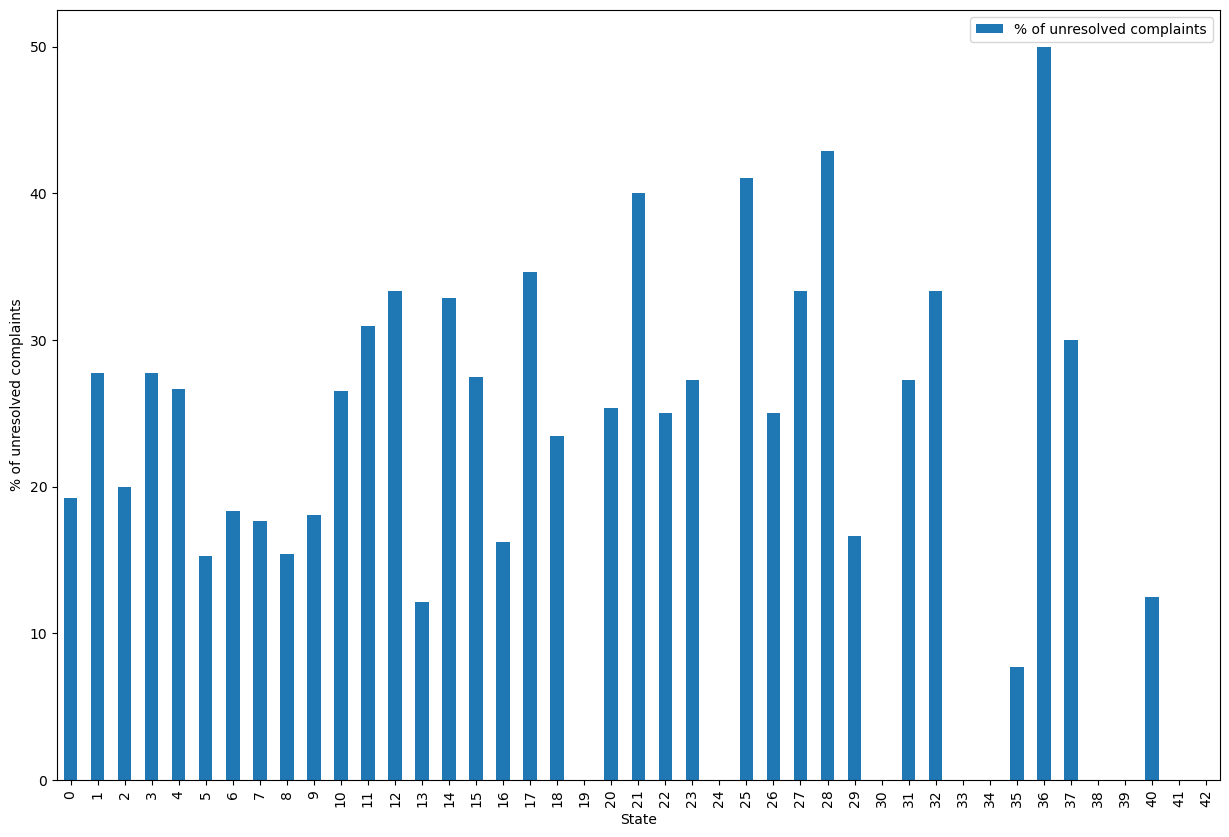

In [129]:
x=p['State']
y=p['% of unresolved complaints']
p.plot(kind='bar',figsize=(15,10))
plt.xlabel('State')
plt.ylabel('% of unresolved complaints')

In [131]:
# from above graph, we infer that Kansas state has highest number of unresolved cases

# Provide the percentage of complaints resolved till date, which were received through the Internet.

In [87]:
df    # view the dataframe

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Paym,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Usage,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Other,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Internet,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Usage,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Usage,Closed


In [89]:
df['Received Via'].unique()      # check all different values in 'Received Via' column

array(['Customer Care Call', 'Internet'], dtype=object)

In [147]:
df_internet_open=df[(df['Received Via']=='Internet')&(df['UPDATED_STATE']=='Open')]  # customer complaints received Via Internet
                                                                                     # which are open

In [134]:
df_internet_open

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage,Open
12,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,13-Jun-15,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,6,Internet,Open
23,370538,Comcast monopoly bundling practices,27-06-15,27-Jun-15,9:04:34 PM,Internet,Alexandria,Virginia,22304,Open,No,6,Usage,Open
25,270163,bait and switch,05-02-15,05-Feb-15,3:55:24 PM,Internet,Algonquin,Illinois,60102,Open,Yes,2,Other,Open
26,355976,Comcast Customer Service,22-06-15,22-Jun-15,2:10:39 PM,Internet,Aliquippa,Pennsylvania,15001,Open,No,6,Usage,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,375388,Comcast Data Cap Overage Fees,30-06-15,30-Jun-15,4:19:50 PM,Internet,West Monroe,Louisiana,71291,Pending,No,6,Usage,Open
2168,284195,Comcast,05-11-15,05-Nov-15,5:25:20 PM,Internet,Westfield,Massachusetts,1085,Open,No,11,Usage,Open
2173,366969,Internet speed,25-06-15,25-Jun-15,8:05:35 PM,Internet,Wexford,Pennsylvania,15090,Pending,No,6,Internet,Open
2177,376295,Slow internet service,30-06-15,30-Jun-15,10:57:27 PM,Internet,White House,Tennessee,37188,Open,No,6,Internet,Open


In [143]:
df_internet_closed=df[(df['Received Via']=='Internet')&(df['UPDATED_STATE']=='Closed')] # complaints received from internet that were closed

In [144]:
df_internet_closed

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Paym,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet,Closed
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Usage,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,12,Internet,Closed
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,6,Usage,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,326963,Internet Services,06-06-15,06-Jun-15,4:01:16 PM,Internet,Wyoming,Michigan,49509,Closed,No,6,Internet,Closed
2213,256002,i had sent out a check payment comcast,24-04-15,24-Apr-15,5:05:36 PM,Internet,York,Pennsylvania,17401,Closed,No,4,Paym,Closed
2214,310847,Comcast Internet Service quality,28-05-15,28-May-15,8:56:14 AM,Internet,York,Pennsylvania,17403,Solved,No,5,Internet,Closed
2217,254488,problems with internet service,24-04-15,24-Apr-15,5:05:25 AM,Internet,York Haven,Pennsylvania,17370,Closed,No,4,Internet,Closed


In [150]:
x=len(df_internet_closed)
x

843

In [151]:
y=len(df_internet_open)
y

262

In [152]:
# Percentage of complaints resolved which were received through internet
(x/(x+y))*100

76.289592760181

# Provide the percentage of complaints resolved till date, which were received through customer care calls

In [103]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Paym,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Usage,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Usage,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Other,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Internet,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,Usage,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,Usage,Closed


In [158]:
df_custcare_closed=df[(df['Received Via']=='Customer Care Call')& (df['UPDATED_STATE']=='Closed')]    # create a separate dataframe of customer complaints received Via 
                                                                                                   # Customer Care Call

In [159]:
df_custcare_closed

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet,Closed
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,1,Usage,Closed
11,276409,YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE,05-06-15,05-Jun-15,3:09:49 PM,Customer Care Call,Albuquerque,New Mexico,87109,Closed,No,6,Email,Closed
14,376268,Internet Disconnects Every Night,30-06-15,30-Jun-15,10:30:02 PM,Customer Care Call,Albuquerque,New Mexico,87116,Solved,No,6,Internet,Closed
16,363695,Internet Availability and Speed,24-06-15,24-Jun-15,11:47:33 PM,Customer Care Call,Alexandria,Indiana,46001,Solved,No,6,Internet,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,360946,Comcast unfair pricing,24-06-15,24-Jun-15,8:32:24 AM,Customer Care Call,York,Pennsylvania,17403,Solved,No,6,Usage,Closed
2216,363852,High Internet & Cable Bill,25-06-15,25-Jun-15,7:17:21 AM,Customer Care Call,York,Pennsylvania,17404,Solved,Yes,6,Internet,Closed
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,Other,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,Internet,Closed


In [162]:
df_custcare_open=df[(df['UPDATED_STATE']=='Open')&(df['Received Via']=='Customer Care Call')] # complaints received from Customer Care Calls 
                                                                       # that are open

In [163]:
df_custcare_open

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,Complaint Category,UPDATED_STATE
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,Usage,Open
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,6,Usage,Open
15,370137,Internet complaint,27-06-15,27-Jun-15,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,6,Internet,Open
38,300824,"INTERNET , BILLING AND SERVIE ISSUES",21-05-15,21-May-15,9:34:19 AM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No,5,Internet,Open
39,348923,Comcast blocking DirecTv signals,18-06-15,18-Jun-15,1:50:02 PM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No,6,Usage,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,339481,Terrible internet service from Comcast,13-06-15,13-Jun-15,7:14:02 PM,Customer Care Call,Woodbridge,Virginia,22191,Open,No,6,Internet,Open
2202,305166,comcst data cap,24-05-15,24-May-15,12:34:08 AM,Customer Care Call,Woodstock,Georgia,30188,Open,Yes,5,Usage,Open
2208,374570,comcast cap,30-06-15,30-Jun-15,12:42:45 PM,Customer Care Call,Woodstock,Georgia,30188,Pending,No,6,Usage,Open
2218,338192,"Speed throttling, speeds not at promised output",06-12-15,06-Dec-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,12,Internet,Open


In [166]:
x=len(df_custcare_open)
x

255

In [167]:
y=len(df_custcare_closed)
y

864

In [168]:
# percentage of complaints resolved till date, which were received through customer care calls
(y/(x+y))*100

77.21179624664879